# Aplicação de um Rede Neural Artificial com o `Keras`

As redes neurais artificiais (RNAs) são modelos computacionais inspirados no funcionamento do cérebro humano. Elas são amplamente utilizadas em áreas como visão computacional, processamento de linguagem natural, reconhecimento de padrões e muitas outras tarefas de aprendizado de máquina.

O `Keras` é uma biblioteca de aprendizado profundo (*deep learning*) escrita em `Python`, que facilita a construção e treinamento de redes neurais. Ele foi projetado para ser simples e intuitivo, permitindo que os usuários criem rapidamente modelos de RNA poderosos.

Uma das principais vantagens do `Keras` é sua interface de alto nível, que abstrai muitos dos detalhes de implementação da RNA. Isso torna o processo de criação de redes neurais mais acessível, especialmente para aqueles que estão começando a explorar o campo do aprendizado de máquina.

Primeiramente, vamos carregar os dados:

In [56]:
# carregamento de dados das etapas anteriores

import numpy as np

X = np.load('temp_data/khushaba_feat.npy')
y = np.load('temp_data/khushaba_lab.npy')
X.shape, y.shape

((2460, 8), (2460,))

Definição de uma função para plotar o histórico de erros e treinamento:

In [57]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(history.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

Agora vamos importar todas as bibliotecas necessárias:

In [58]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

Vamos converter as classes para o formato *one-hot encoding* (para que independentemente do formato dos labels como string, eles sejam convertidos para uma sequência lógica de inteiros). Em seguida, vamos dividir os dados em conjuntos de treinamento e teste usando a função `train_test_split`. Neste exemplo, reservamos 30% dos dados para teste, especificando `test_size=0.3`.

In [59]:
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Agora vamos criar o modelo da Rede Neural. Usamos a classe `Sequential` do `Keras` para criar uma sequência de camadas. Adicionamos duas camadas densas com ativação `ReLU` (*Rectified Linear Unit*) e uma camada de saída com ativação `softmax`, pois temos 8 classes diferentes.

In [60]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

Compilamos usando o otimizador `adam` e a função de perda `categorical_crossentropy`. Além disso, definimos a métrica `accuracy` para avaliar o desempenho do modelo durante o treinamento (lembrando que nossas classes estão balanceadas).

In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Em seguida, treinamos o modelo usando o método `fit`, fornecendo os dados de treinamento (`X_train`) e os rótulos correspondentes (`y_train_encoded`). Especificamos o número de épocas como 10 e um tamanho de lote (`batch size`) de 32. Além disso, usamos os dados de teste (`X_test` e `y_test_encoded`) como dados de validação para acompanhar a precisão do modelo durante o treinamento.

Após o treinamento, avaliamos o modelo usando o método `evaluate`, passando os dados de teste (`X_test` e `y_test_encoded`). Isso nos fornece a perda final e a precisão alcançada pelo modelo nos dados de teste.

Epoch 1/10
54/54 [==============================] - 0s 2ms/step - loss: 2.3016 - accuracy: 0.1057 - val_loss: 2.3079 - val_accuracy: 0.0867
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: 2.3016 - accuracy: 0.1051 - val_loss: 2.3080 - val_accuracy: 0.0881
Epoch 3/10
54/54 [==============================] - 0s 1ms/step - loss: 2.3015 - accuracy: 0.1010 - val_loss: 2.3079 - val_accuracy: 0.0867
Epoch 4/10
54/54 [==============================] - 0s 1ms/step - loss: 2.3016 - accuracy: 0.1057 - val_loss: 2.3074 - val_accuracy: 0.0867
Epoch 5/10
54/54 [==============================] - 0s 1ms/step - loss: 2.3015 - accuracy: 0.0987 - val_loss: 2.3077 - val_accuracy: 0.0867
Epoch 6/10
54/54 [==============================] - 0s 1ms/step - loss: 2.3015 - accuracy: 0.1098 - val_loss: 2.3078 - val_accuracy: 0.0867
Epoch 7/10
54/54 [==============================] - 0s 1ms/step - loss: 2.3015 - accuracy: 0.1057 - val_loss: 2.3076 - val_accuracy: 0.0867
Epoch 8/10
54/54 [==

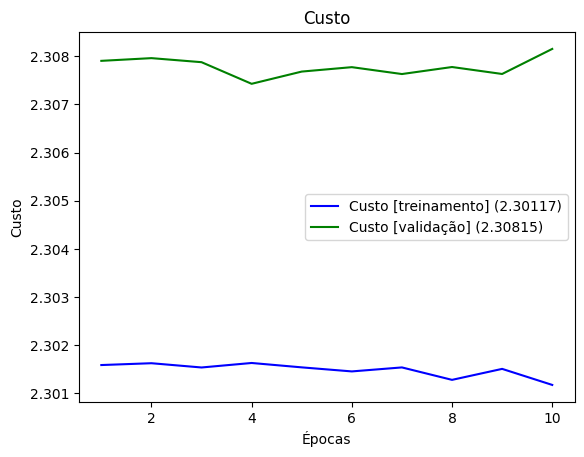

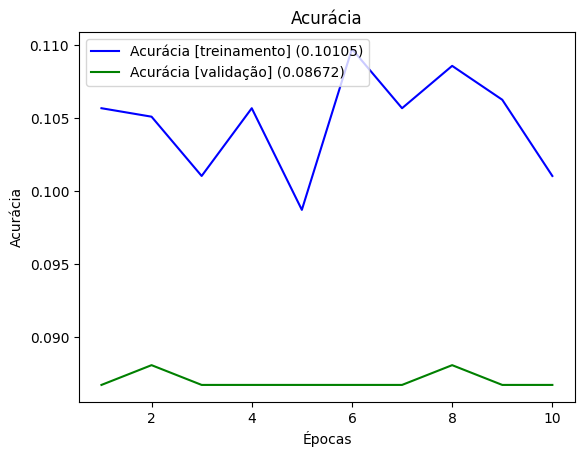

24/24 [==============================] - 0s 729us/step - loss: 2.3082 - accuracy: 0.0867
Loss: 2.308152675628662
Accuracy: 0.08672086894512177


In [64]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
plot_history(history)
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)